### Comments
***This problem can be solved using 2 heaps***

* We keep the potential candidates of the left and the right of the array in the heaps.
* When we pop we add to the heap and try not to overlap the 2 arrays.
* if initally they are overlapped k> len(costs)//2 then we keep the index to verifiy that they are the same element and pop from both stacks

### Complexity:

***Time***: O(c + klog(c))

* c being the candidate size and k being the number of workers.
* c comes from going over costs and building our initial heaps.
* k comes from the picking process.
* log(c) comes from the insertion for the heaps of c size

***Space***:O(c) 

In [ ]:
import heapq


class Solution:
    def totalCost(self, costs: list[int], k: int, candidates: int) -> int:
        ans = 0
        costSize = len(costs)
        left = [(costs[i], i) for i in range(candidates)]
        right = [(costs[costSize - i - 1], costSize - i - 1) for i in range(candidates)]
        heapq.heapify(left)
        heapq.heapify(right)

        p1 = candidates - 1
        p2 = costSize - candidates

        for _ in range(k):
            if left and not right:
                ans += heapq.heappop(left)[0]
            elif right and not left:
                ans += heapq.heappop(right)[0]
            elif left[0] <= right[0]:
                if left[0] == right[0]:
                    heapq.heappop(right)[0]
                ans += heapq.heappop(left)[0]
            else:
                ans += heapq.heappop(right)[0]

            if len(left) < candidates and p1 < p2:
                p1 += 1
                heapq.heappush(left, (costs[p1], p1))

            if len(right) < candidates and p2 > p1:
                p2 -= 1
                heapq.heappush(right, (costs[p2], p2))

        return ans

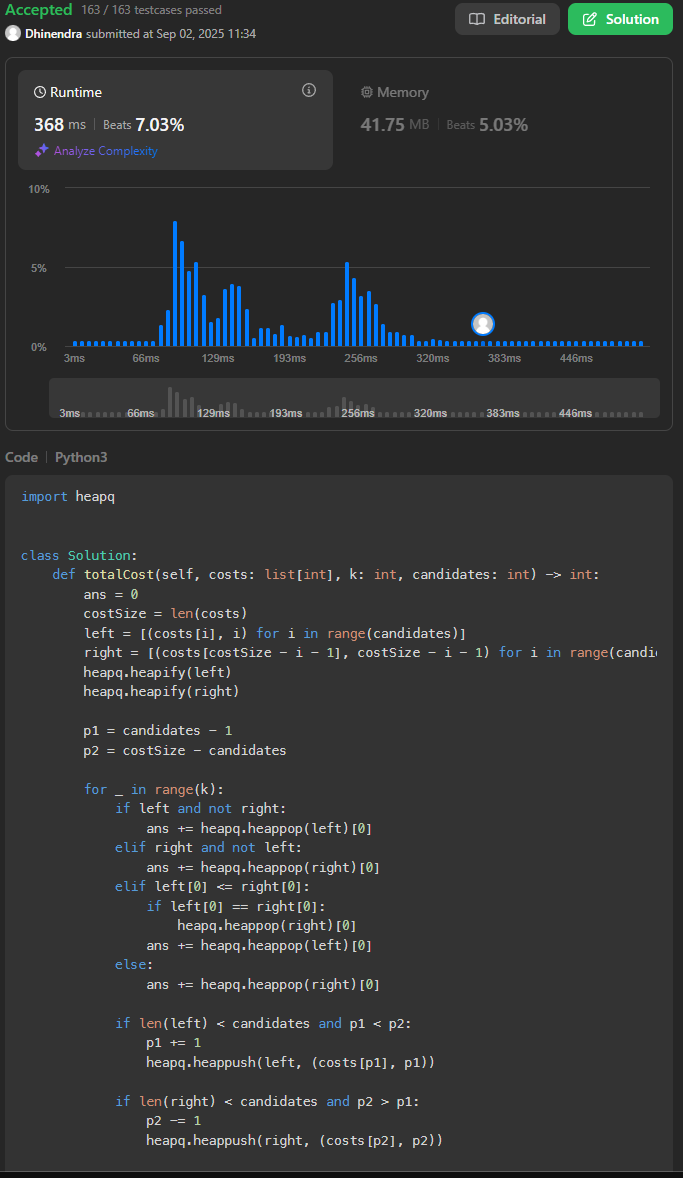

### Community References:

* Improved version which stops the overlap which means we dont have to do the equality check.

```
class Solution:
    def totalCost(self, costs: list[int], k: int, candidates: int) -> int:
        ans = 0
        costSize = len(costs)
        rightStart = costSize - max(candidates, costSize - candidates)

        left = [costs[i] for i in range(candidates)]
        right = [costs[i] for i in range(costSize - rightStart, costSize)]
        heapq.heapify(left)
        heapq.heapify(right)

        p1 = candidates
        p2 = costSize - candidates - 1

        for _ in range(k):
            if left and not right:
                ans += heapq.heappop(left)
            elif right and not left:
                ans += heapq.heappop(right)
            elif left[0] <= right[0]:
                ans += heapq.heappop(left)
            else:
                ans += heapq.heappop(right)

            if len(left) < candidates and p1 <= p2:
                heapq.heappush(left, costs[p1])
                p1 += 1

            if len(right) < candidates and p2 >= p1:
                heapq.heappush(right, costs[p2])
                p2 -= 1

        return ans
```


* An even more improved version comes with one queue and keep track of where the removal occured.

```
class Solution:
    def totalCost(self, costs: list[int], k: int, candidates: int) -> int:
        ans = 0
        costSize = len(costs)
        rightStart = costSize - max(candidates, costSize - candidates)

        hp = []

        for i in range(candidates):
            hp.append((costs[i], 0))

        for i in range(costSize - rightStart, costSize):
            hp.append((costs[i], 1))

        heapq.heapify(hp)

        p1 = candidates
        p2 = costSize - candidates - 1

        for _ in range(k):
            ele = heapq.heappop(hp)
            ans += ele[0]
            if not ele[1] and p1 <= p2:
                heapq.heappush(hp, (costs[p1], 0))
                p1 += 1
            elif ele[1] and p1 <= p2:
                heapq.heappush(hp, (costs[p2], 1))
                p2 -= 1

        return ans
```



